In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [9]:
df = pd.read_csv(r'C:\Users\dhruv\Desktop\Admission_Predict_Ver1.1.csv')

In [10]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.shape

(500, 9)

In [13]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Data Visulization..

Text(0.5, 1.0, 'Impact of GRE score for Acceptance')

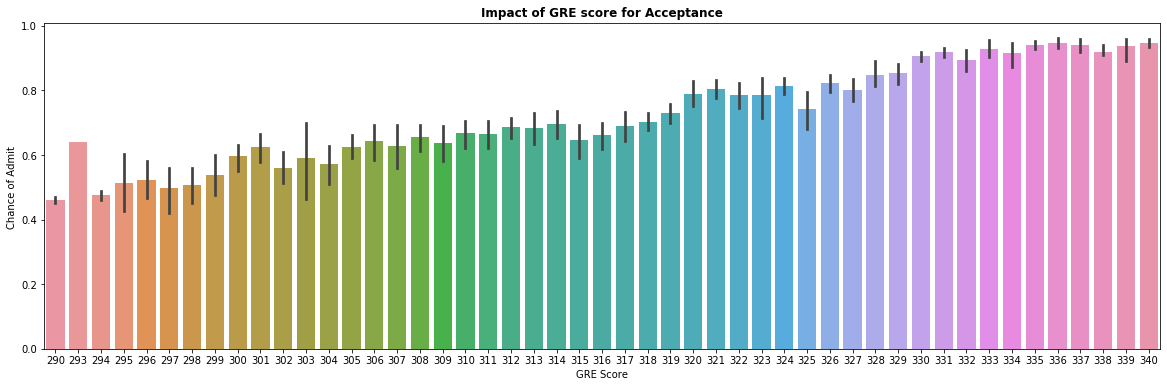

In [35]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df['GRE Score'], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of GRE score for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of TOEFL score for Acceptance')

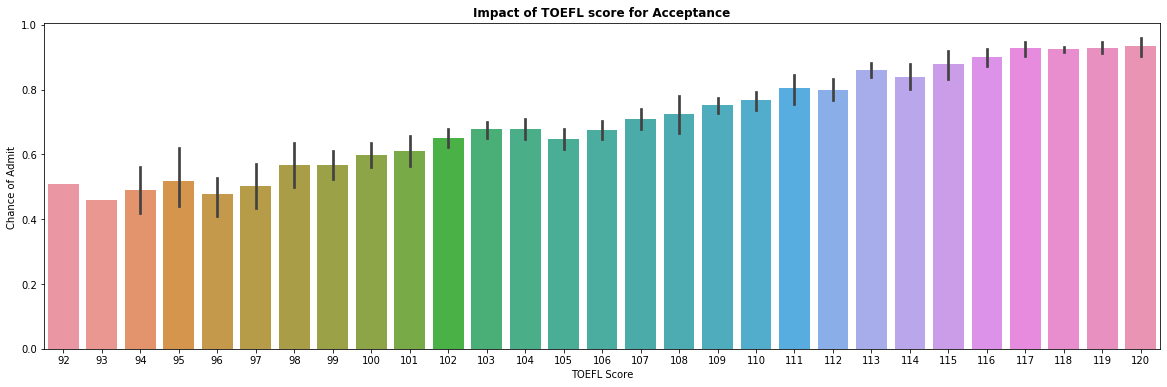

In [36]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df['TOEFL Score'], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of TOEFL score for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of CGPA score for Acceptance')

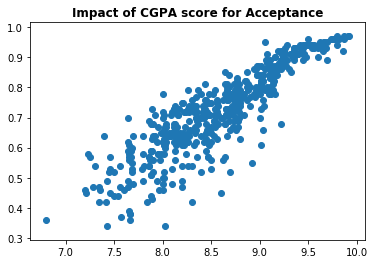

In [37]:
plt.scatter(df['CGPA'], df['Chance of Admit '])
plt.title('Impact of CGPA score for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of University Rating for Acceptance')

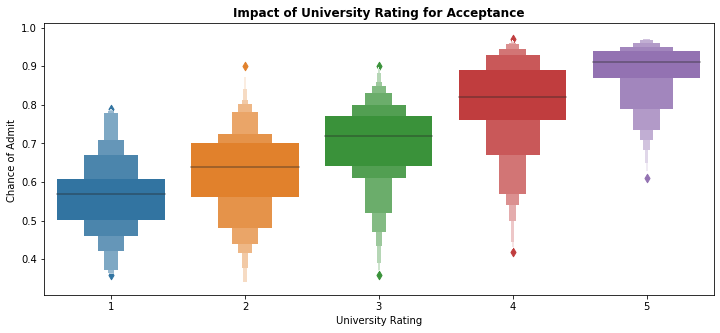

In [46]:
fig_dims = (12,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x =df['University Rating'], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of University Rating for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of Research Work for Acceptance')

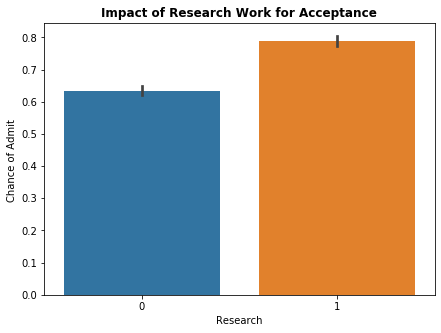

In [58]:
fig_dims = (7,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df['Research'], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of Research Work for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of SOP for Acceptance')

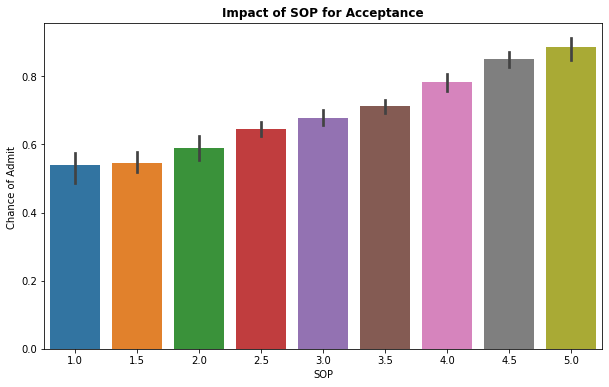

In [60]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df['SOP'], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of SOP for Acceptance', weight='bold')

Text(0.5, 1.0, 'Impact of LOR for Acceptance')

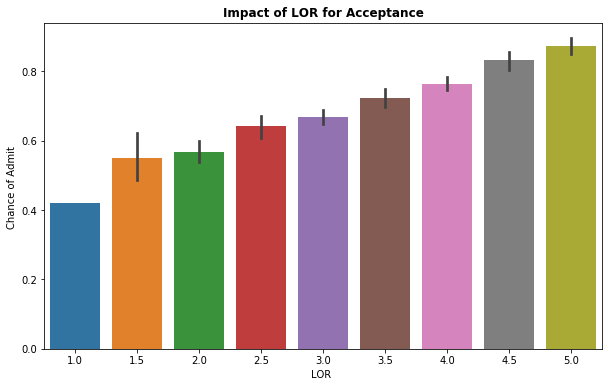

In [62]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df['LOR '], y=df['Chance of Admit '], ax=ax)
plt.title('Impact of LOR for Acceptance', weight='bold')

# Feature Engineering..

In [63]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
#Lets split the dataset into X and Y..

X = df.drop(['Chance of Admit '], axis=1)
Y = df['Chance of Admit ']

In [65]:
#Splitting data into train and test..

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 8)
(125, 8)
(375,)
(125,)


In [68]:
#lets scale the train dataset inorder to improve performance..

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Lets implement the models..

In [100]:
#Random Forrest Regressor.

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
model_rfc = RandomForestRegressor(n_estimators=200)

In [101]:
model_rfc.fit(X_train, Y_train)
y_pred = model_rfc.predict(X_test)

In [102]:
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

0.004269953779999995
0.7589424232733386


In [92]:
#Support Vector Regressor.

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVR
model_svm = SVR()

In [93]:
model_svm.fit(X_train, Y_train)
y_pred = model_svm.predict(X_test)
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

0.006226627391036869
0.591003449157571


In [94]:
#XGBoost Regressor.

from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
model_xgbr = XGBRegressor()

In [95]:
model_xgbr.fit(X_train, Y_train)
y_pred = model_xgbr.predict(X_test)
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

[17:40:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.004259203187712007
0.7619301577237951


In [96]:
#XGBoost Regressor.

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import ExtraTreesRegressor
model_extr = ExtraTreesRegressor()

In [97]:
model_extr.fit(X_train, Y_train)
y_pred = model_extr.predict(X_test)
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

0.003933140079999996
0.760481460135591


In [98]:
#Linear Regression.

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [99]:
model_lr.fit(X_train, Y_train)
y_pred = model_lr.predict(X_test)
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

0.004237035350600127
0.7386970274108171
